# Index

1. [Analysing the dataset](#Analysing-the-dataset)
    1. [Missing Values](#Missing-Values)
    1. [Distribution of Disease Types](#Distribution-of-Disease-Types)
    1. [Features by Type](#Features-by-Type)
    1. [Data Correlation](#Data-correlation)
1. [Improving the dataset](#Improving-the-dataset)
1. [Data Labeling & Encoding](#Data-labeling-&-encoding)
1. [Algorithms](#Algorithms)
    1. [Random Forest](#Random-Forest)
    1. [SVM](SVM)
    1. [K-NN](K-NN)

# Config

In [1]:
OVERFIT = False
GRID_SEARCH = False
CROSS_VALIDATION = True

# Analysing the dataset

In [2]:
import pandas as pd

symptom_data = pd.read_csv('covid-symptoms.csv')
symptom_data.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


## Missing Values

After a quick check of the csv file we did not find any missing values. To guarantee it however, we search the dataframe for any null/nan value.

In [3]:
symptom_data.isnull().values.any()

False

In [4]:
symptom_data.describe()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
count,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000
mean,0.520662,0.519762,0.519897,0.519358,0.496232,0.495850,0.325400,0.324253,0.324523,0.323465,0.323893,0.324455,0.422986,0.423234,0.184285,0.184285,0.184285,0.184285,0.519313,0.184240
std,0.499579,0.499615,0.499610,0.499631,0.499991,0.499988,0.468529,0.468100,0.468201,0.467804,0.467965,0.468176,0.494039,0.494077,0.387720,0.387720,0.387720,0.387720,0.499633,0.387684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Distribution of Disease Types

In [5]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [6]:
data_distribution = symptom_data.groupby(by=['TYPE']).count()
data_distribution

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
TYPE,,,,,,,,,,,,,,,,,,,,
ALLERGY,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381
COLD,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024
COVID,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048
FLU,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000


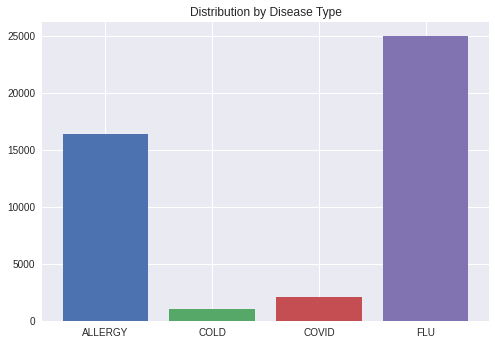

In [7]:
fig, ax = plt.subplots()

ax.set_title('Distribution by Disease Type')

ax.bar('ALLERGY', data_distribution.loc['ALLERGY', 'FEVER'])
ax.bar('COLD', data_distribution.loc['COLD', 'FEVER'])
ax.bar('COVID', data_distribution.loc['COVID', 'FEVER'])
ax.bar('FLU', data_distribution.loc['FLU', 'FEVER'])
del data_distribution

## Features by Type

In [8]:
import math

def plot_bars(symptom_data: pd.DataFrame):
    features = list(symptom_data.columns)
    features.remove('TYPE')

    types = symptom_data['TYPE'].unique()

    cols = math.ceil(math.sqrt(len(features)))
    rows = math.ceil(len(features) / cols)
    fig, axs = plt.subplots(rows, cols, sharex='col', sharey='row', figsize=(cols * 2.5, rows * 2.5))

    labels = {
        'COVID': 'C-19',
        'FLU': 'FLU',
        'ALLERGY': 'ALR',
        'COLD': 'COLD',
    }

    for i in range(len(features)):
        ax = axs[i % rows][i // rows]

        for disease in types:
            disease_df = symptom_data.loc[symptom_data['TYPE']==disease]
            total_disease = disease_df['TYPE'].count()
            with_feature = disease_df.loc[disease_df[features[i]] == 1, 'TYPE'].count()

            ax.bar([labels[disease]], [with_feature / total_disease])

        ax.set_ylim(0, 1)
        ax.set_title(features[i])

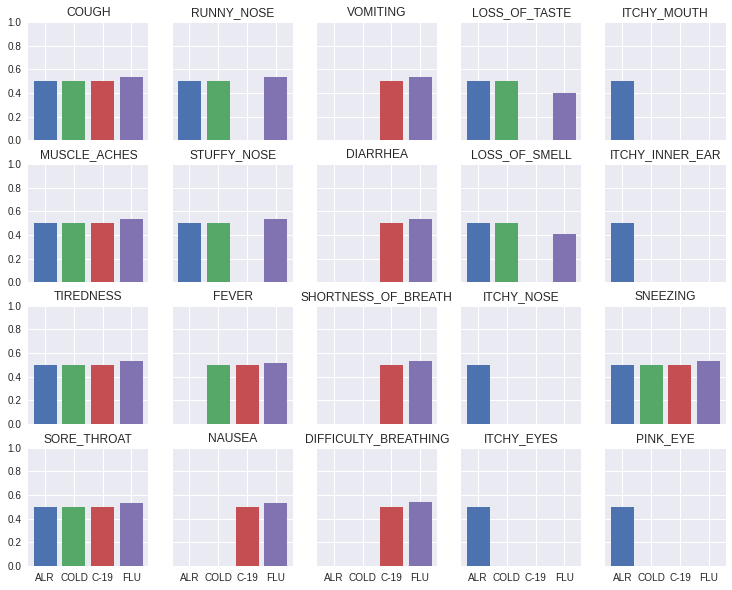

In [9]:
plot_bars(symptom_data)

## Data correlation

In [10]:
symptom_data.corr()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
COUGH,1.000000,-0.006751,-0.006131,-0.006357,-0.004079,-0.005263,0.013227,0.011657,0.010091,0.011686,0.011211,0.009665,0.023971,0.020439,-0.019659,-0.019659,-0.019659,-0.019659,-0.007885,-0.019656
MUSCLE_ACHES,-0.006751,1.000000,-0.005879,-0.005115,-0.004903,-0.004737,0.013419,0.009344,0.011051,0.009273,0.010917,0.005815,0.020134,0.020613,-0.018801,-0.018801,-0.018801,-0.018801,-0.004571,-0.018682
TIREDNESS,-0.006131,-0.005879,1.000000,-0.007378,-0.003460,-0.004285,0.012271,0.008773,0.009998,0.011203,0.012270,0.009956,0.019720,0.020929,-0.018930,-0.018930,-0.018930,-0.018930,-0.004401,-0.018927
SORE_THROAT,-0.006357,-0.005115,-0.007378,1.000000,-0.003828,-0.004744,0.012156,0.007886,0.009689,0.008196,0.010900,0.008877,0.022103,0.017297,-0.018415,-0.018415,-0.018415,-0.018415,-0.005801,-0.018529
RUNNY_NOSE,-0.004079,-0.004903,-0.003460,-0.003828,1.000000,0.041040,-0.007682,-0.005257,-0.008614,-0.004647,-0.008821,-0.006934,0.060959,0.060366,0.003582,0.003582,0.003582,0.003582,-0.004189,0.003698
STUFFY_NOSE,-0.005263,-0.004737,-0.004285,-0.004744,0.041040,1.000000,-0.005134,-0.006265,-0.008853,-0.009120,-0.008388,-0.007461,0.058063,0.059747,0.003946,0.003946,0.003946,0.003946,-0.002043,0.004061
FEVER,0.013227,0.013419,0.012271,0.012156,-0.007682,-0.005134,1.000000,0.280095,0.278506,0.277233,0.277221,0.279749,-0.050197,-0.049666,-0.330111,-0.330111,-0.330111,-0.330111,0.010489,-0.330062
NAUSEA,0.011657,0.009344,0.008773,0.007886,-0.005257,-0.006265,0.280095,1.000000,0.299449,0.301886,0.300841,0.303055,-0.041432,-0.040998,-0.329249,-0.329249,-0.329249,-0.329249,0.008333,-0.329200
VOMITING,0.010091,0.011051,0.009998,0.009689,-0.008614,-0.008853,0.278506,0.299449,1.000000,0.300497,0.300582,0.300948,-0.042111,-0.043136,-0.329452,-0.329452,-0.329452,-0.329452,0.009366,-0.329403
DIARRHEA,0.011686,0.009273,0.011203,0.008196,-0.004647,-0.009120,0.277233,0.301886,0.300497,1.000000,0.297675,0.301024,-0.042451,-0.044059,-0.328658,-0.328658,-0.328658,-0.328658,0.011435,-0.328609


From the correlation matrix we cannot conclude any relevant relationship between features

## Improving the data set

From the information gathered above, we merged many features, using the `max` method, as it works as a psuedo-and operator between the different values. For example we united all the itches into one unique feature.

In [11]:
symptom_data['ITCH'] = symptom_data[['ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'PINK_EYE']].any(axis='columns')
symptom_data.drop(columns=['ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'PINK_EYE'], inplace=True);

symptom_data['SENSE_LOSS'] = symptom_data[['LOSS_OF_TASTE', 'LOSS_OF_SMELL']].any(axis='columns')
symptom_data.drop(columns=['LOSS_OF_TASTE', 'LOSS_OF_SMELL'], inplace=True);

symptom_data['NOSE_PROBLEMS'] = symptom_data[['RUNNY_NOSE', 'STUFFY_NOSE']].any(axis='columns')
symptom_data.drop(columns=['RUNNY_NOSE', 'STUFFY_NOSE'], inplace=True);

symptom_data['GASTRO_PROBLEMS'] = symptom_data[['DIARRHEA', 'NAUSEA', 'VOMITING']].any(axis='columns')
symptom_data.drop(columns=['DIARRHEA', 'NAUSEA', 'VOMITING'], inplace=True);

symptom_data['BREATHING_PROBLEMS'] = symptom_data[['SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING']].any(axis='columns')
symptom_data.drop(columns=['SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING'], inplace=True);

We then dropped other features entirely, as was the case with the COUGH, MUSCLE_ACHE, TIREDNESS, SORE_THROAT and SNEEZING columns.

These columns were very similar and all displayed a roughly equal distribution.

In [12]:
symptom_data.drop(columns=['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'SNEEZING'], inplace=True)

In [13]:
# Reorder the TYPE column to end for consistency
type_series = symptom_data['TYPE']
symptom_data = symptom_data.drop(columns=['TYPE'])
symptom_data['TYPE'] = type_series

In [14]:
symptom_data.head()

,FEVER,ITCH,SENSE_LOSS,NOSE_PROBLEMS,GASTRO_PROBLEMS,BREATHING_PROBLEMS,TYPE
0,0,True,True,True,False,False,ALLERGY
1,0,True,True,False,False,False,ALLERGY
2,0,True,True,False,False,False,ALLERGY
3,0,True,True,True,False,False,ALLERGY
4,0,True,True,True,False,False,ALLERGY


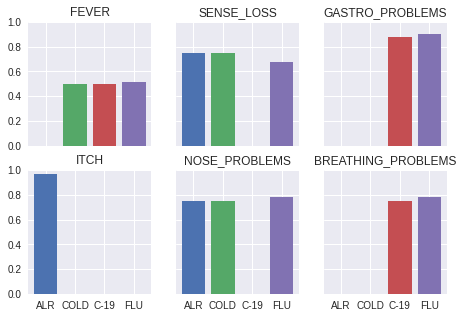

In [15]:
plot_bars(symptom_data)

# Data labeling & encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
disease_types = ('ALLERGY','COLD','COVID','FLU')
types_label = pd.DataFrame(symptom_data, columns=['TYPE'])

labelencoder = LabelEncoder()  # creating instance of labelencoder

symptom_data['TYPE_LABELED'] = labelencoder.fit_transform(symptom_data['TYPE'])    # Assigning numerical values and storing in another column

In [17]:
# We can extract the data in this format from pandas like this:
inputs = symptom_data[symptom_data.columns.difference(['TYPE', 'TYPE_LABELED'], sort=False)].values

# Similarly, we can extract the class labels
labels = symptom_data['TYPE_LABELED'].values


# Classifier Evaluation

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from collections import Counter

# (training_inputs,
#  testing_inputs,
#  training_classes,
#  testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

def evaluate(inputs, labels, classifier, n_splits=4, smote=True):

    sss = StratifiedShuffleSplit(n_splits = n_splits , test_size=0.5, random_state=0)
    sss.get_n_splits(inputs, labels)

    scoresTest = []
    scoresTrain = []

    for train_index, test_index in sss.split(inputs, labels):

        X_train, X_test = inputs[train_index], inputs[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        if smote:
            X_train, y_train = SMOTE(random_state=0).fit_resample(X_train, y_train)
            # print(sorted(Counter(labels_resampled).items()))

        classifier.fit(X_train, y_train)

        predTest = classifier.predict(X_test)
        
        scoresTest.append(metrics.f1_score(y_test, predTest, average='weighted'))

    return scoresTest


# Algorithms

## Random Forest

In [19]:
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

def random_forest(inputs, labels):
    # Create the classifier
    random_forest_classifier = RandomForestClassifier()

    results = evaluate(inputs, labels, random_forest_classifier)

    return results

In [20]:
random_forest(inputs, labels)

[0.9432251077867017,
 0.9430332267202357,
 0.9428099984853731,
 0.9424569529145276]

## Check for overfitting

Some times, due to how data is handled we can have cases of overfitting wich is when the classifier only learnt how to classify the training data and not the test data, so we need to verify if this is happening in our dataset.

In [21]:
def checkOverFit(all_inputs, all_labels):
    model_accuracies = []
    model_precision = []

    for repetition in range(1000):
        (training_inputs,
        testing_inputs,
        training_classes,
        testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
        
        random_forest_classifier = RandomForestClassifier()
        random_forest_classifier.fit(training_inputs, training_classes)
        classifier_accuracy = random_forest_classifier.score(testing_inputs, testing_classes)
        model_accuracies.append(classifier_accuracy)

    plt.hist(model_accuracies)

In [22]:
if OVERFIT:
    checkOverFit(inputs, labels)

From what we can see on the graph, out of 1000 iterations, there is a maximum of 0.01 difference in the accuracy of the predictions.
Because of this, we can claim that our classifiers are not overfit and we can proceed in doing more tests using different algorithms, without needing to make any adjustment to the data.

## SVM

In [23]:
from sklearn import svm

clf = svm.SVC(kernel='sigmoid')

results = evaluate(inputs, labels, clf)

In [24]:
print(results)

[0.759467540948296, 0.7574229644100048, 0.7602812025412016, 0.7589257603078179]


## K-NN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(inputs, labels, n_neighbors = None):
    if(n_neighbors == None):
        n_neighbors = math.floor(math.sqrt(len(inputs)/2))

    neigh = KNeighborsClassifier(n_neighbors)
    
    results = evaluate(inputs, labels, neigh)

    return results


In [26]:
KNN(inputs, labels)

[0.9334145975589052,
 0.9344309663459087,
 0.9394454097262335,
 0.9275929644516325]

In [27]:
if GRID_SEARCH:
    from sklearn.model_selection import GridSearchCV

    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1)

    forest = RandomForestClassifier(random_state = 1)

    n_estimators = [100, 300, 500, 800, 1200]
    max_depth = [5, 8, 15, 25, 30]
    min_samples_split = [2, 5, 10, 15, 100]
    min_samples_leaf = [1, 2, 5, 10] 

    hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
                min_samples_split = min_samples_split, 
                min_samples_leaf = min_samples_leaf)

    gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1)

    bestF = gridF.fit(training_inputs, training_classes)

    print(gridF.best_score_)
    print(gridF.best_estimator_)

## Random Forest

In [28]:
from sklearn.model_selection import cross_val_score

random_forest_classifier = RandomForestClassifier(max_depth=8, min_samples_split=100, n_estimators=800, random_state=1)
scores = cross_val_score(random_forest_classifier, inputs, labels, cv=5, scoring='f1_weighted')

print("%0.2f f1 score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.94 f1 score with a standard deviation of 0.00


## SVM


In [29]:
clf = svm.SVC(kernel='sigmoid')
scores = cross_val_score(clf, inputs, labels, cv=5, scoring='f1_weighted')

print("%0.2f f1 score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.93 f1 score with a standard deviation of 0.00


## KNN

In [30]:
neigh = KNeighborsClassifier(math.floor(math.sqrt(len(inputs)/2)))
scores = cross_val_score(neigh, inputs, labels, cv=5, scoring='f1_weighted')

print("%0.2f f1 score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

NameError: name 'all_inputs' is not defined

# Smote

In [41]:
from imblearn.over_sampling import SMOTE
from collections import Counter

inputs_resampled, labels_resampled = SMOTE().fit_resample(inputs, labels)
print(sorted(Counter(labels_resampled).items()))


scores = StratifiedShuffleSplitWrapper(random_forest_classifier,inputs_resampled,labels_resampled)

[(0, 25000), (1, 25000), (2, 25000), (3, 25000)]


([0.9604715228722734, 0.9597795065616085, 0.959553176827996, 0.9609968364411469], [0.9603251624319978, 0.9610165745773831, 0.9612434841129964, 0.9598001602035421])


## Crossvalidating smote

In [43]:
scores = cross_val_score(random_forest_classifier, inputs_resampled, labels_resampled, cv=5, scoring='f1_macro')

print("%0.2f f1 score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 f1 score with a standard deviation of 0.00
